In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv')

In [4]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [8]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
num_cols = df.select_dtypes(exclude=['object']).columns.to_list()

In [10]:
num_cols

['PatientID',
 'Age',
 'Gender',
 'Ethnicity',
 'EducationLevel',
 'BMI',
 'Smoking',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'MemoryComplaints',
 'BehavioralProblems',
 'ADL',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness',
 'Diagnosis']

In [11]:
#for i in num_cols:
 #   plt.hist(df[i])
  #  plt.title(f"{i}")
   # plt.show()

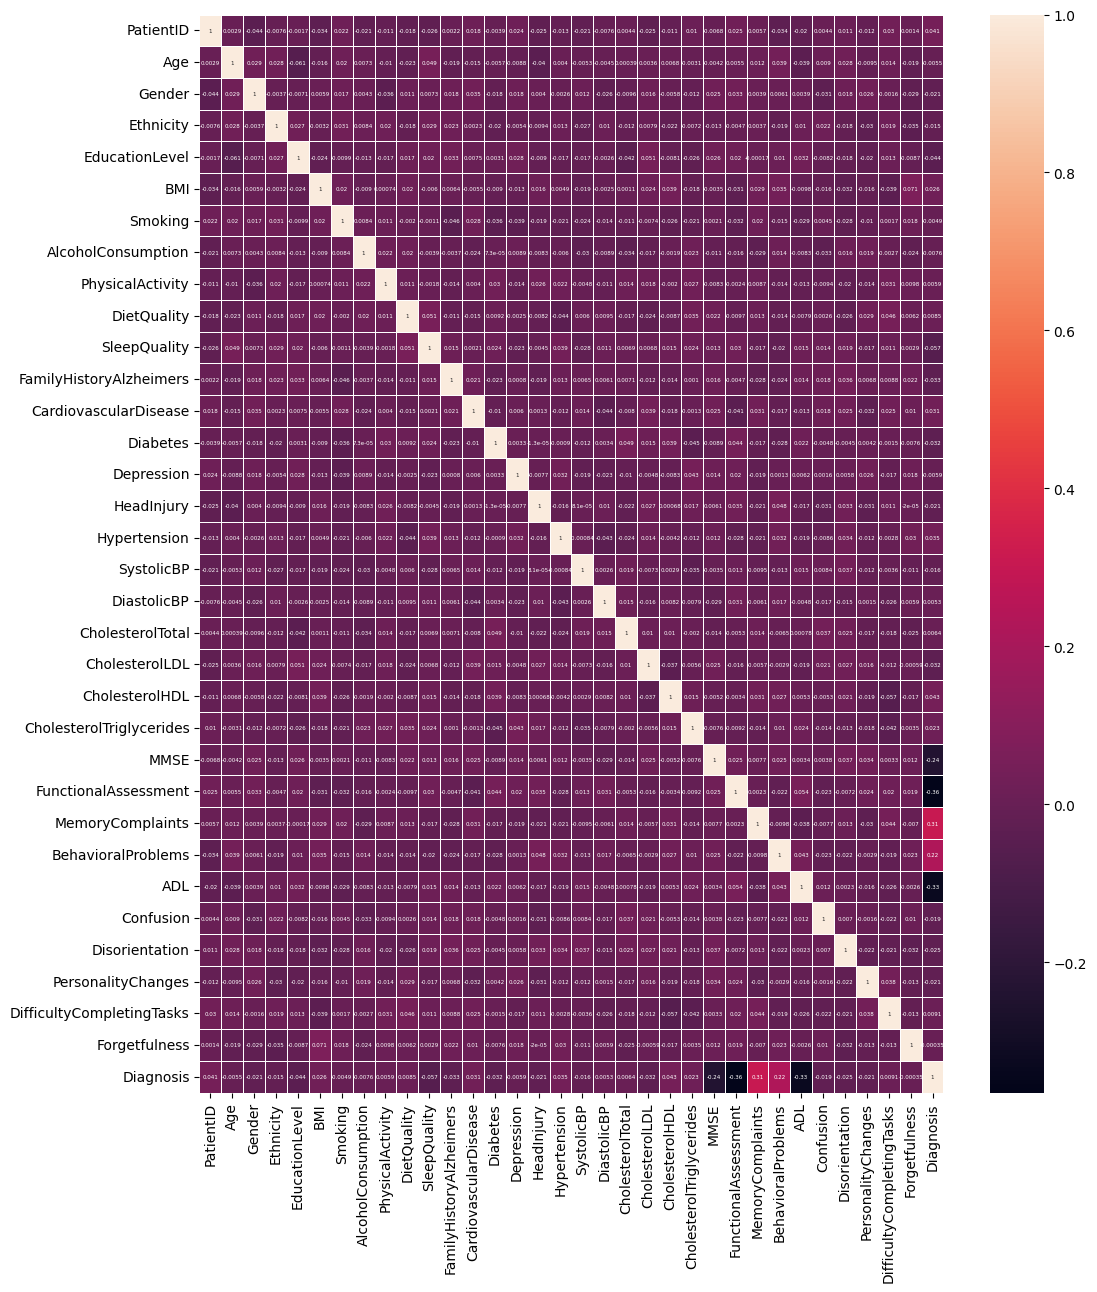

In [12]:
plt.figure(figsize=(12,14))
sns.heatmap(df.corr(numeric_only=True),annot=True,annot_kws={'size':4},linewidth=0.5,)
plt.show()

# --> Alzhemier Rate show by count plot

<Figure size 1400x1200 with 0 Axes>

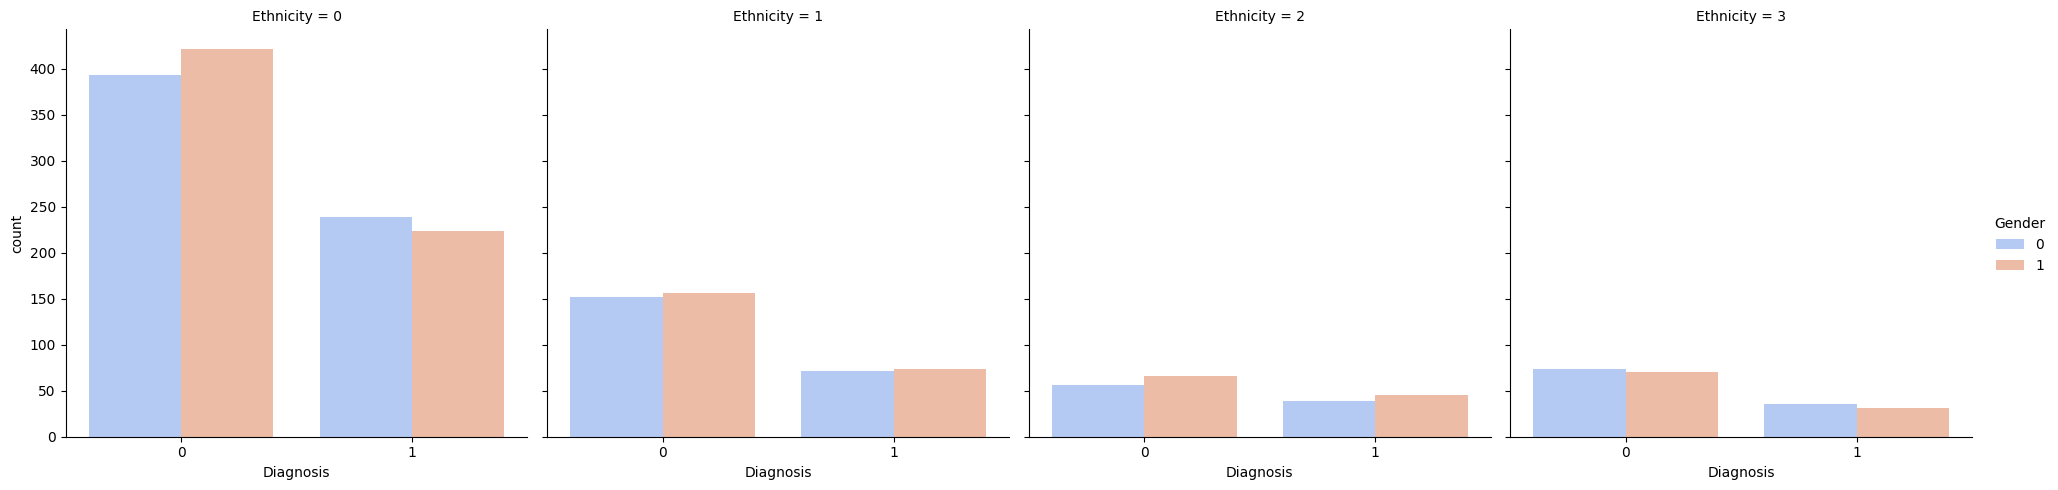

In [13]:
plt.figure(figsize=(14,12))
sns.catplot(x='Diagnosis',hue='Gender',col='Ethnicity',kind='count',data=df,palette='coolwarm')
plt.show()

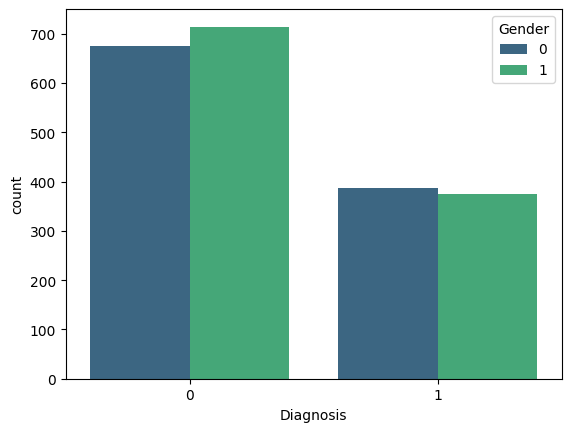

In [14]:
sns.countplot(x='Diagnosis',hue='Gender',data=df,palette='viridis')
plt.show()

# --> Age Show in Histplot

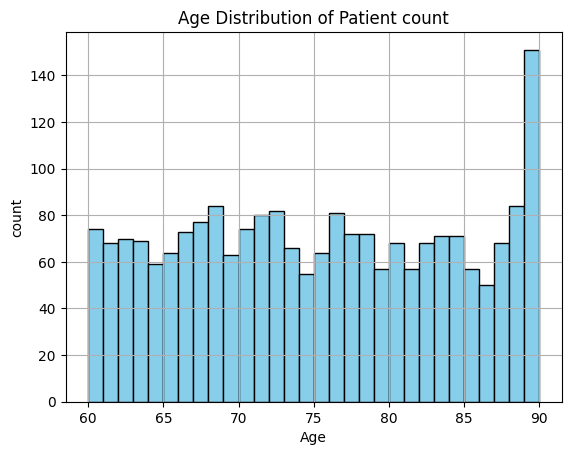

In [15]:
df['Age'].hist(bins=30,edgecolor='black',color='skyblue')
plt.title('Age Distribution of Patient count')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

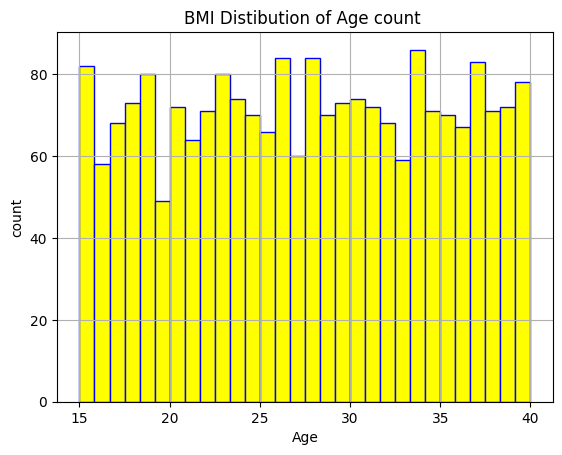

In [16]:
df['BMI'].hist(bins=30,edgecolor='blue',color='yellow')
plt.title('BMI Distibution of Age count ')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

# --> BMI or SleepQuality check in Boxplot

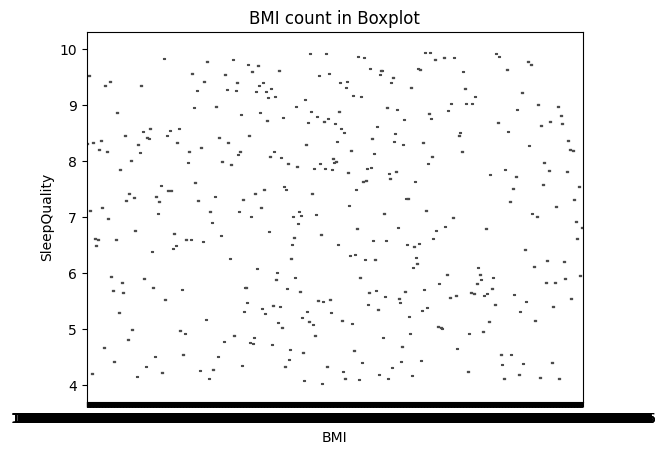

In [17]:
sns.boxplot(x=df['BMI'],y=df['SleepQuality'],color='orange')
plt.title('BMI count in Boxplot')
plt.show()

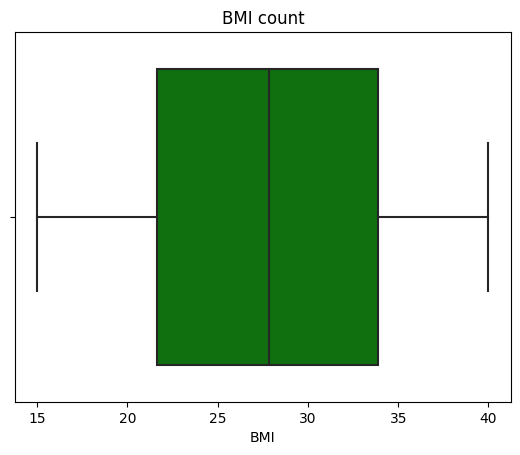

In [18]:
sns.boxplot(x=df['BMI'],color='green')
plt.title('BMI count')
plt.show()

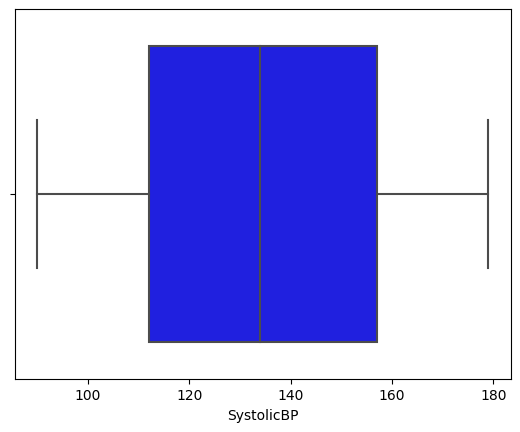

In [19]:
sns.boxplot(x=df['SystolicBP'],color='blue')
plt.show()

# --> Countplot show which people atre Diagnosised

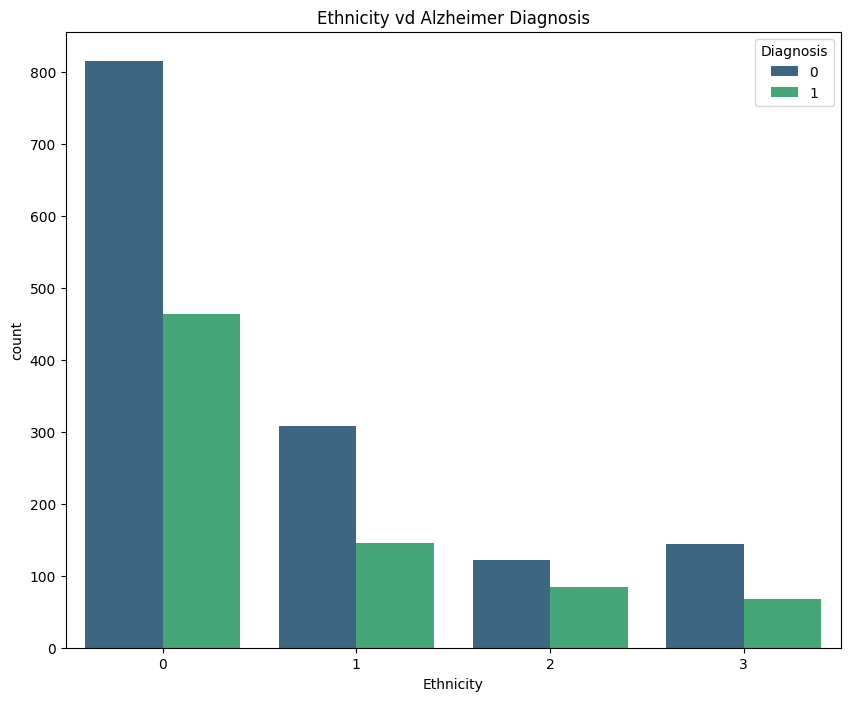

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x='Ethnicity',hue='Diagnosis',data=df,palette='viridis')
plt.title("Ethnicity vd Alzheimer Diagnosis")
plt.show()

# --> Diagnosis shown by age in violinplot

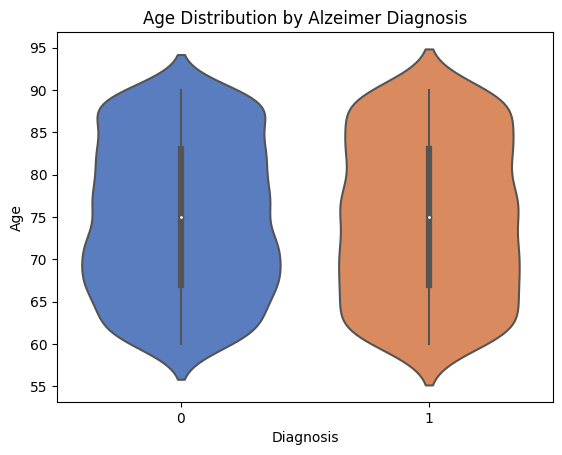

In [21]:
sns.violinplot(x='Diagnosis',y='Age',data=df,palette='muted')
plt.title('Age Distribution by Alzeimer Diagnosis')
plt.show()

# --> Systolic Blood Pressure shown in Line plot

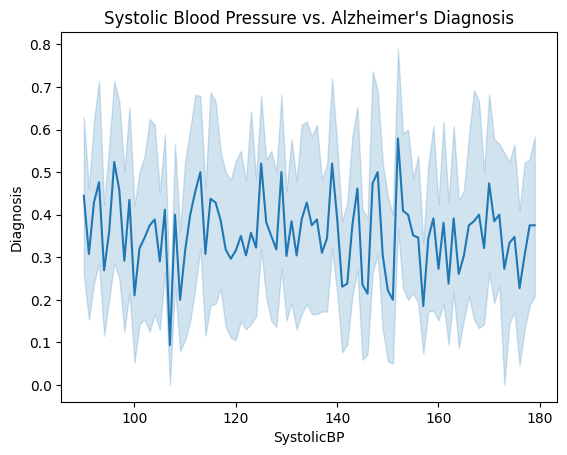

In [22]:
sns.lineplot(x='SystolicBP', y='Diagnosis', data=df, estimator='mean')
plt.title("Systolic Blood Pressure vs. Alzheimer's Diagnosis")
plt.show()

# --> Memory complaints in Alzheimer Diagnosis Patient

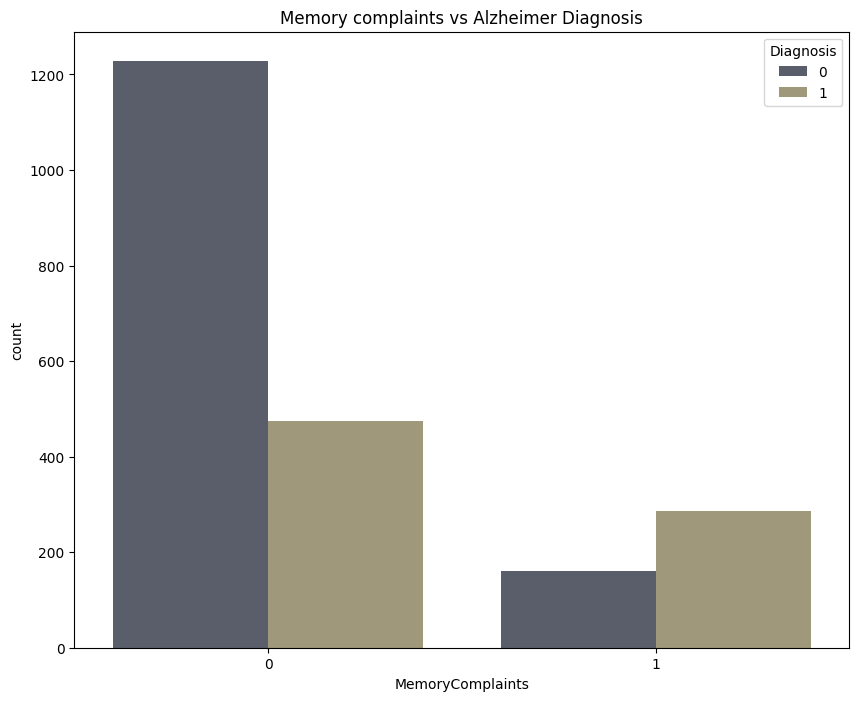

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(x='MemoryComplaints',hue='Diagnosis',data=df,palette='cividis')
plt.title("Memory complaints vs Alzheimer Diagnosis")
plt.show()

# --> Cholestro and PhysicalActivity shown in Scatterplot

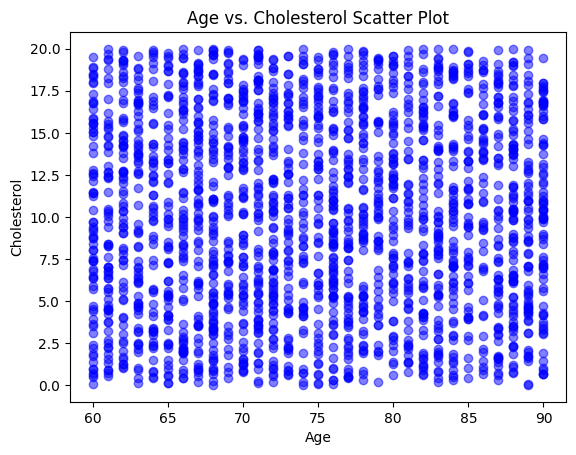

In [24]:
plt.scatter(df['Age'], df['AlcoholConsumption'], color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs. Cholesterol Scatter Plot')
plt.show()

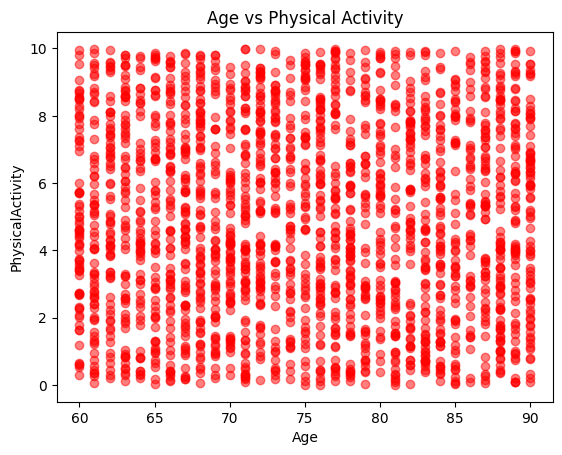

In [25]:
plt.scatter(df['Age'],df['PhysicalActivity'],color='red',alpha=0.5)
plt.title('Age vs Physical Activity')
plt.xlabel('Age')
plt.ylabel('PhysicalActivity')
plt.show()

# --> Apply for ML algorithms in this data for better accuracy

In [26]:
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

In [27]:
numerical_columns

['PatientID',
 'Age',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'ADL']

# --> Using train_test_split to train models

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x = df.drop(['DoctorInCharge','Diagnosis'],axis=1)
y =df['Diagnosis']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# --> Using LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
x_train = scaler.fit_transform(x_train)         #datapoint - mean /standard devision
x_test = scaler.transform(x_test)

In [35]:
log_reg = LogisticRegression()

In [36]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [37]:
pred = log_reg.predict(x_test)

# --> Using Metrics to check accuracy score

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,pred)

0.8159851301115242

# --> Using DecisionTree

In [40]:
from sklearn import tree

In [41]:
tree1 = tree.DecisionTreeClassifier()

In [42]:
tree1.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
tree_pred = tree1.predict(x_test)

In [44]:
accuracy_score(y_test,tree_pred)

0.9349442379182156

# --> **Using RandomForestClassifier**

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
Random = RandomForestClassifier(n_estimators=100)

In [47]:
Random.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
Random_pred=Random.predict(x_test)

In [49]:
accuracy_score(y_test,Random_pred)

0.9182156133828996

# --> Using XGBoost

In [50]:
import xgboost

In [51]:
xgb = xgboost.XGBClassifier()

In [52]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
xgb_pred = xgb.predict(x_test)

In [54]:
accuracy_score(y_test,xgb_pred)

0.949814126394052

# --> Alzheimer Diseases this data set to check

# --> Total 4 Algorithms are used to check accuracy_score 
     --> LogisticRegression Accuracy is = 0.81
     --> DecisionTree Accuracy is = 0.91
     --> RandomForestClassifier Accuracy is = 0.91
     --> XGBoost Accuracy is = 0.94
      Total 4 Algorithms are apply and best accuracy score for only 1 model
#  --> XGBoost = 0.94